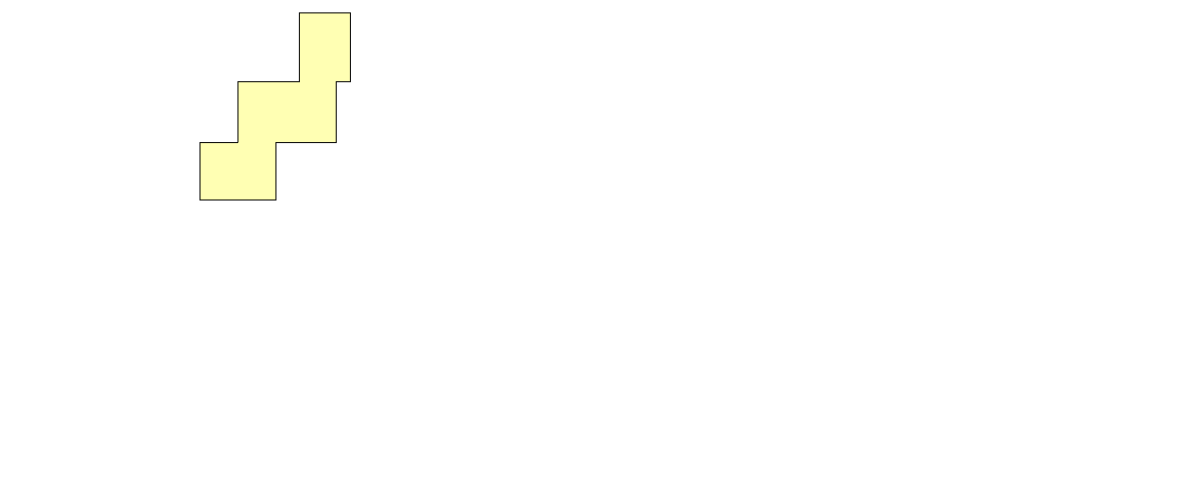

In [1]:
"""
Synth.ipynb
- [x] Generate rooms using boolean unions
- [x] Pick random extinguisher placements
- [ ] Calculate remote locations
- [ ] Deliver verdict
- [ ] Export to JSON dataset.
"""
__author__ = "Bob YX Lee"
import sys
import os
import json
import drawsvg as dw
import random
from copy import deepcopy

sys.path.append("./packages")

from geom.Line2D import Line2D, drawPt
from geom import Poly2D, Bool2D
from geom.Room import Room
import numpy as np
import pyclipper

"""
Generation logic
- Generate a randomly sized rectangle
- Pick a random point along the walls divided into 5m pieces
- Generate another random rectangle
- Place it at the point
- Execute boolean union
- Repeat
"""
SCALE = 100
DIVLEN = 500

WIDTHS = list(range(5000,10000))
DEPTHS = list(range(5000,7000))

def newCanvas():
    return dw.Drawing(1200, 480, origin = (-SCALE*2, -SCALE*2))

d = newCanvas()

room = Room.random(2)
Poly2D.drawPath(d, room.vertices, True)

d

[[3797, 5742], [0, 5742], [0, 0], [7595, 0], [7595, 5742], [13624, 5742], [13624, 11829], [15041, 11829], [15041, 18711], [9938, 18711], [9938, 11829], [3797, 11829]]


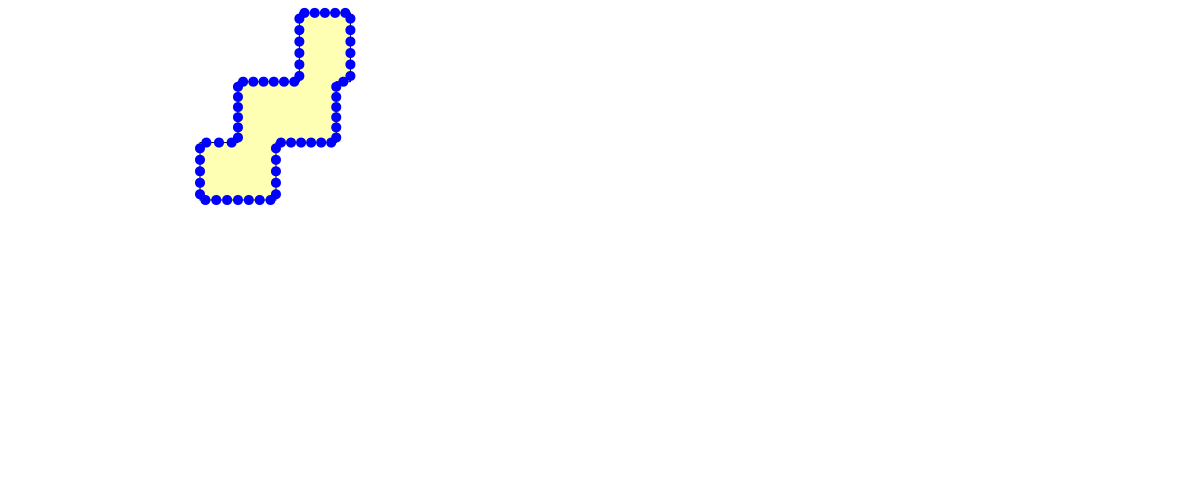

In [2]:
print(room.vertices)
room.gExtSlots(1000)
d3 = deepcopy(d)
for p in room.ext_slots:
    drawPt(d3, p)
    pass
d3

{'result': True, 'diff': []}


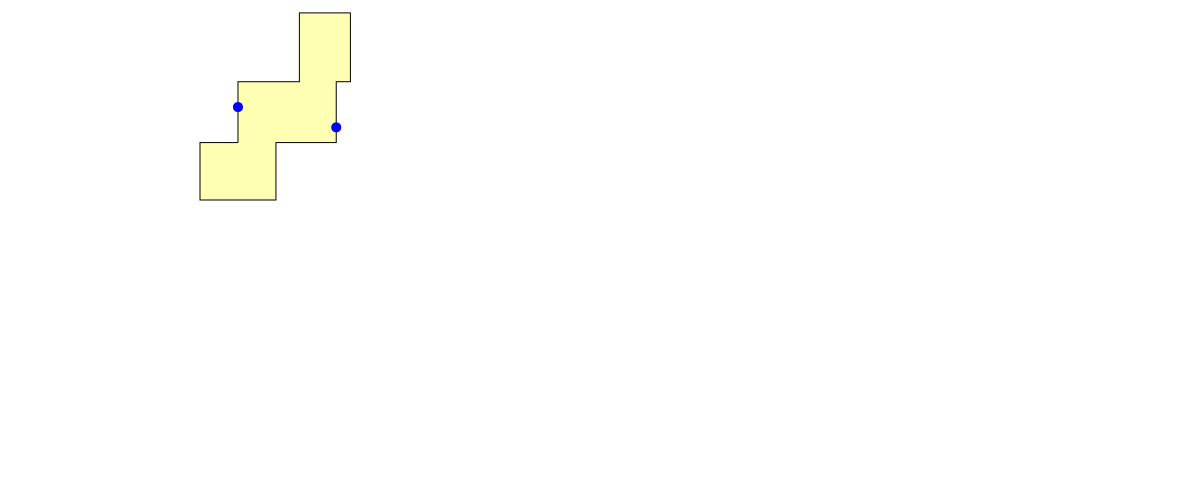

In [3]:
"""
Pick random 1 - 3 slots and make verdict for coverage check
TODO:
- [ ] Generate score based on num exts used to comply
"""
pick_num = random.randint(1,3)
exts = random.sample(room.ext_slots, pick_num)
d4 = deepcopy(d)
for p in exts:
    drawPt(d4, p)

chk1 = room.extCoverChk(exts)

print(chk1)

d4


In [ ]:
"""
Compute travel paths and deliver 2nd verdict
"""
print("WIP")